## Problem Statement 1 

* Classification of a specific heart disease using machine learning techniques.
 
 * Objective: To build machine learning model, that can detect between a subject afflicted with heart disease and someone who is normal

In [1]:
# Creates bins, new features
adv_modelling = ['trestbps', 'chol', 'thalach', 'oldpeak']

Points to note:

    1. Higher the age, risk of heart disease increases
    
    2. Males have higher risk of heart disease
    
    3. cp: Value 3 lowest risk, Value 0 highest predictor of heart disease
    
    4. trestbps (esting blood pressure): Assuming 120 (systolic) / 80 (diaastolic) as normal, above increases risk of h.disease
    
    5. chol: ASsuming generally accepeted level is 200, more than that indicates risk for h.disease
    
    6. fbs: 1 is at higher risk
    
    7. restecg: 0 - normal, 2 - highest
    
    8. thalach: higher the value, risk increases (60-100 normal)
    
    9. exang: 1 - higher risk
    
    10. oldpeak: higher number, risk increases (related to ecg)
    
    11. slope: 2 - highest risk, 0 is lowest risk
    
    12. ca: More number, increase the chance for heart disease
    
    13. thal: thallium stress result - 2 more prone to heart disease
    
    
Top factors:
1) cp (chest pain)

2) ca

3) exang

    

1) Problem statement
    - Highlight attributes specific to dataset
2) Importing required libraries
3) Load data
4) EDA - visualizations, insights
5) Feature engineering and Model building
    - Preprocessing 
        - checking class imbalance
        - Missing values
        - duplicate records
        - Outliers
     
     - Feature selection
         - Correlation wrt target cols
     
     - Model building
         - Train test split
         - ML models -
             Base: min 2 classication models
             Adv: Tree based, DL
         
     - Performance metrics
         - Accuracy , precision, recall, Confusion metrics
         - Train test accuracy plots (check overfitting, underfitting)
        
6) Deployment:
    - Github repo
    - Dockerization, jenkins
    - ngrok

## Table of contents:
* [Problem Statement](#problem_statement)
* [Importing libraries](#Importing_libraries)
* [Reading dataset](#Reading_dataset)
* [Exploratory Data analysis (EDA)](#eda)
* [Feature Engineering](#feature_engineering)
    * [Preprocessing: Class imbalance, missing values](#pre)
    * [Feature selection](#fs)
    * [Model building](#mb)
    * [Performance metrics](#pm)
* [Model Deployment](#)

## Problem statement <a class="anchor" id="problem_statement"></a>

---

Classification of a specific heart disease using machine learning techniques.

> * Objective: To build machine learning model, that can detect between a subject afflicted with heart disease and someone who is normal

## Importing libraries <a class="anchor" id="Importing_libraries"></a>

In [1]:
#Data Handling
import numpy as np 
import pandas as pd 

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree
import graphviz

#Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Train Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

#Evaluate model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

## Reading dataset <a class="anchor" id="Reading_dataset"></a>

In [2]:
DATA_PATH = "../data/heart_cleveland_upload.csv"

df = pd.read_csv(DATA_PATH)

##### Display first few rows of the dataset

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


##### Display shape of the data (rows, columns)

In [4]:
print("No. of rows in the dataset:",df.shape[0])
print("No. of columns in the dataset:",df.shape[1])

No. of rows in the dataset: 297
No. of columns in the dataset: 14


##### Display column names 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [6]:
all_catg_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[all_catg_cols] = df[all_catg_cols].astype(object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    object 
 2   cp         297 non-null    object 
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    object 
 6   restecg    297 non-null    object 
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    object 
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    object 
 11  ca         297 non-null    object 
 12  thal       297 non-null    object 
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 32.6+ KB


## Exploratory Data analysis (EDA) <a class="anchor" id="eda"></a>

In [8]:
# 1. Categorical features

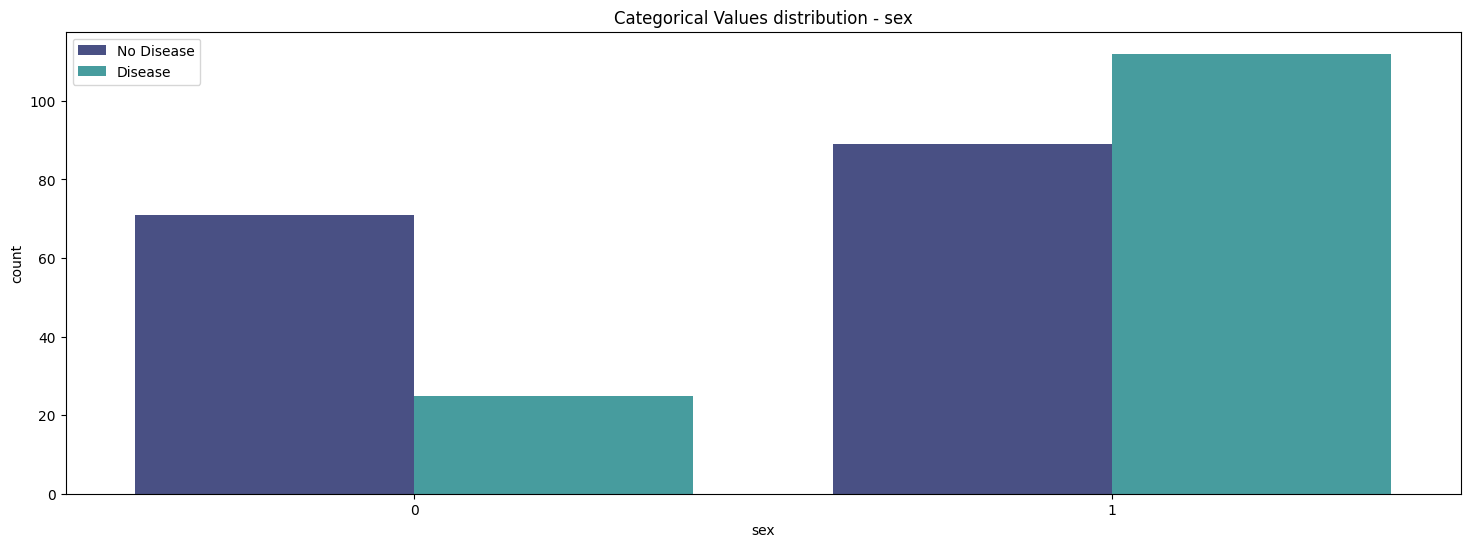

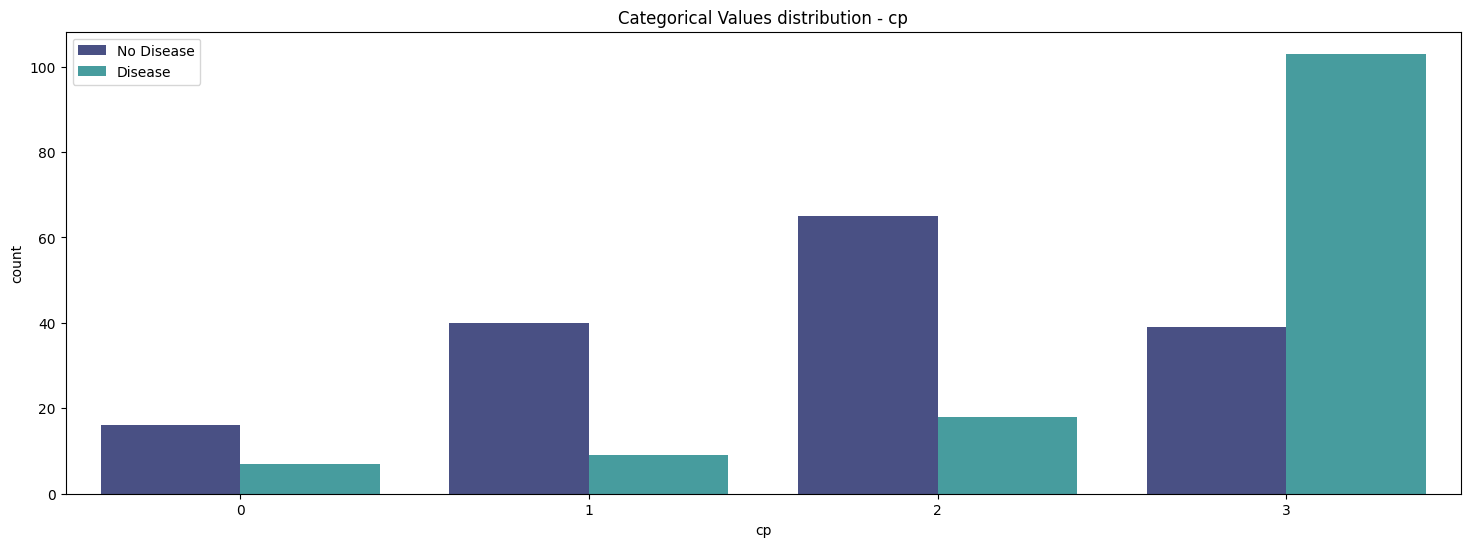

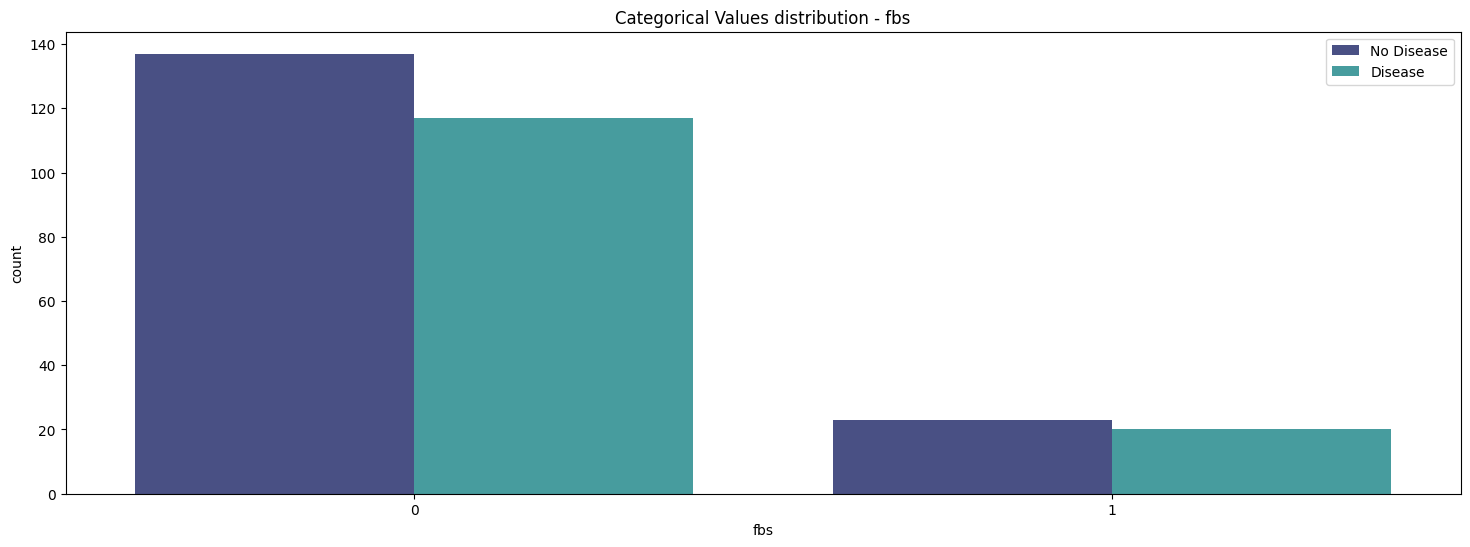

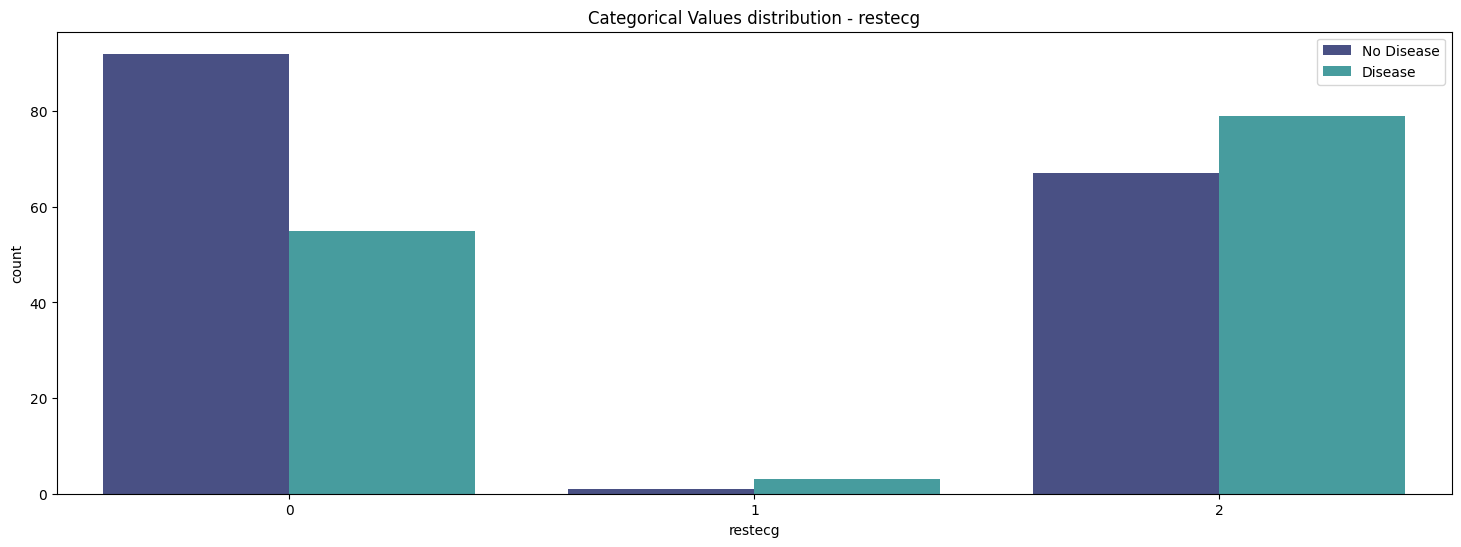

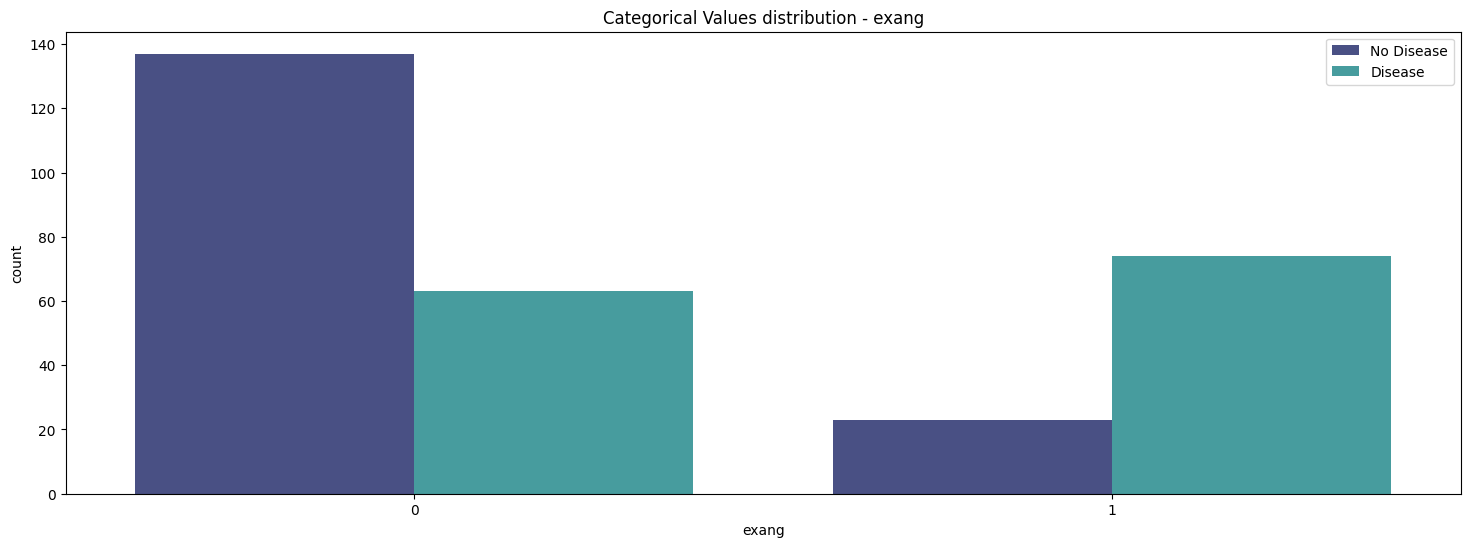

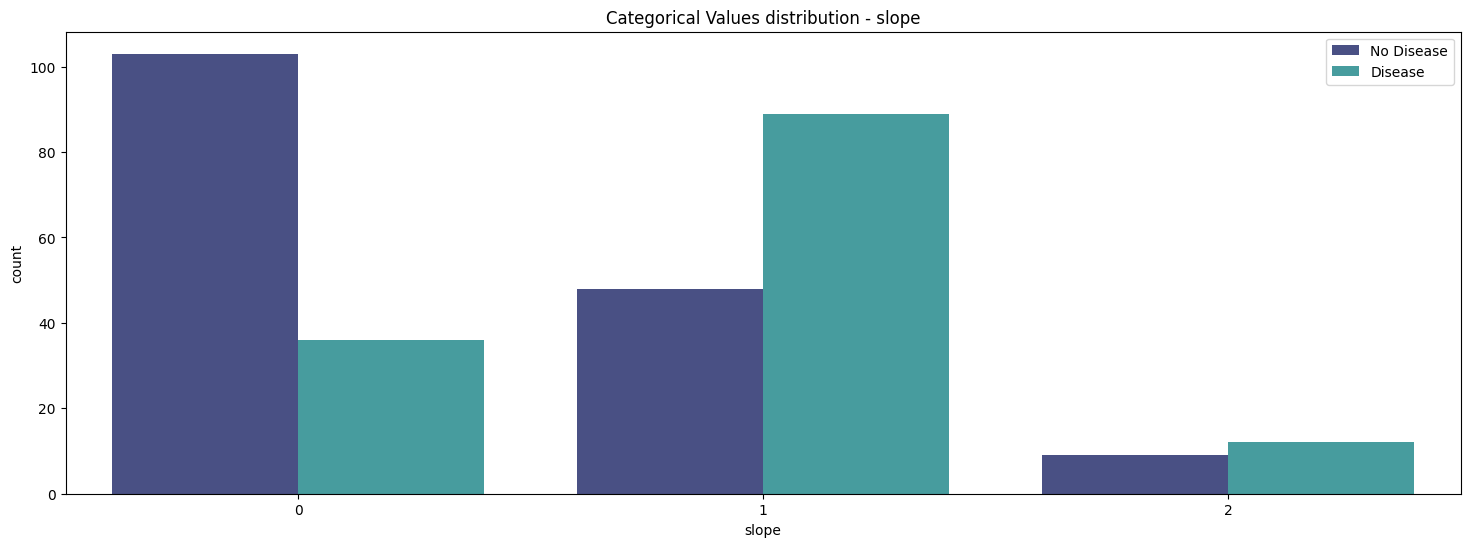

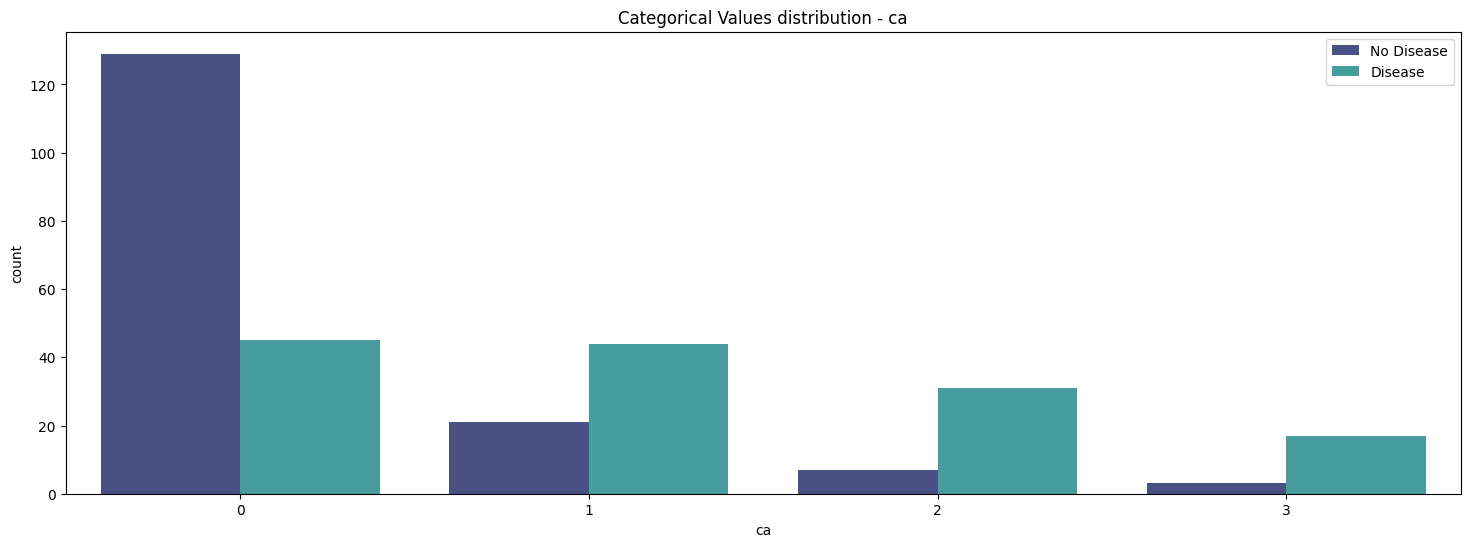

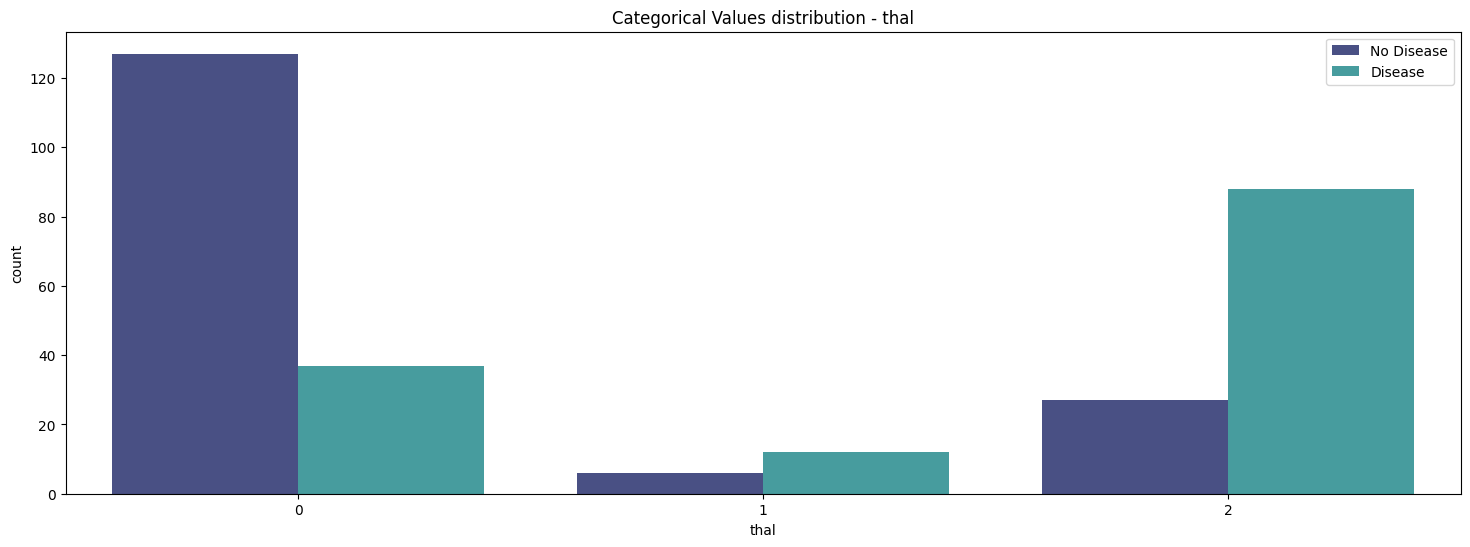

In [9]:
for col in df.select_dtypes("object").columns:
    plt.figure(figsize=(18,6))
    sns.countplot(x=col,data=df, palette="mako", hue="condition")
    plt.title(f'Categorical Values distribution - {col}')
    plt.legend(labels = ['No Disease', 'Disease'])
    plt.show()

In [10]:
# 2. Numerical features

In [11]:
# Select all numeric features
df.drop('condition',axis=1).select_dtypes(include='number')

,age,trestbps,chol,thalach,oldpeak
0,69,160,234,131,0.1
1,69,140,239,151,1.8
2,66,150,226,114,2.6
3,65,138,282,174,1.4
4,64,110,211,144,1.8
...,...,...,...,...,...
292,40,152,223,181,0.0
293,39,118,219,140,1.2
294,35,120,198,130,1.6
295,35,138,183,182,1.4


In [12]:
# Check spread of data
df.drop('condition',axis=1).describe(include='number')

,age,trestbps,chol,thalach,oldpeak
count,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556
std,9.049736,17.762806,51.997583,22.941562,1.166123
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000
75%,61.000000,140.000000,276.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


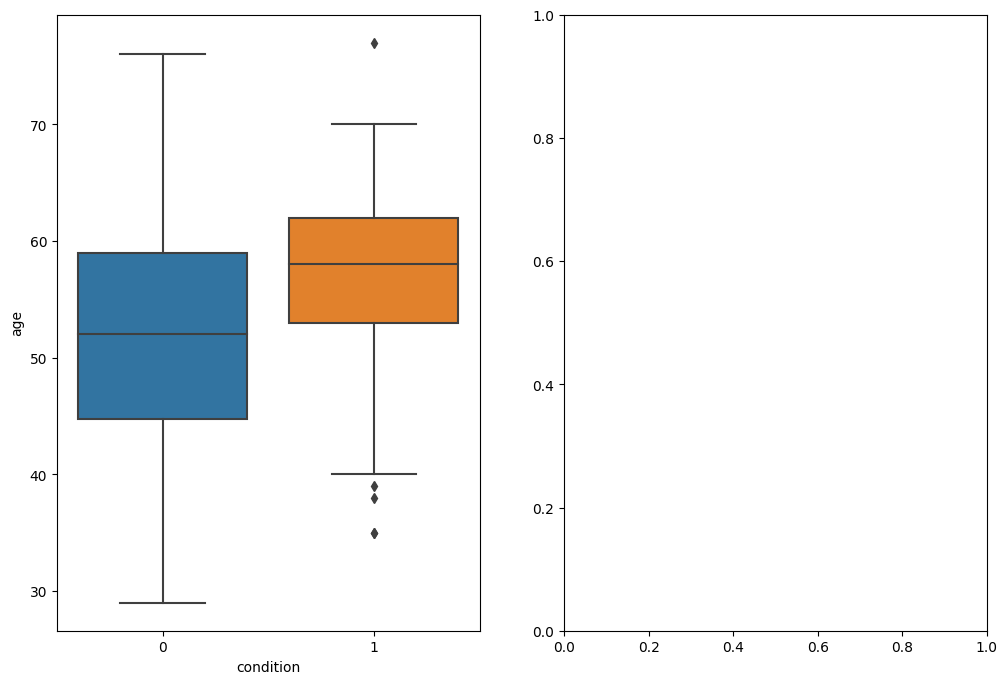

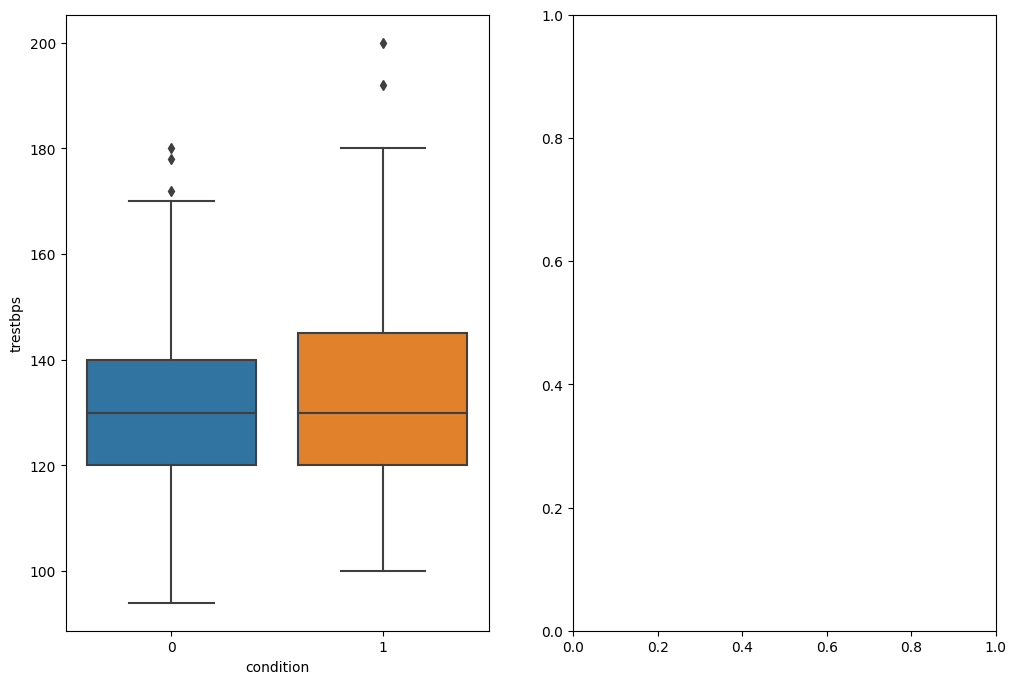

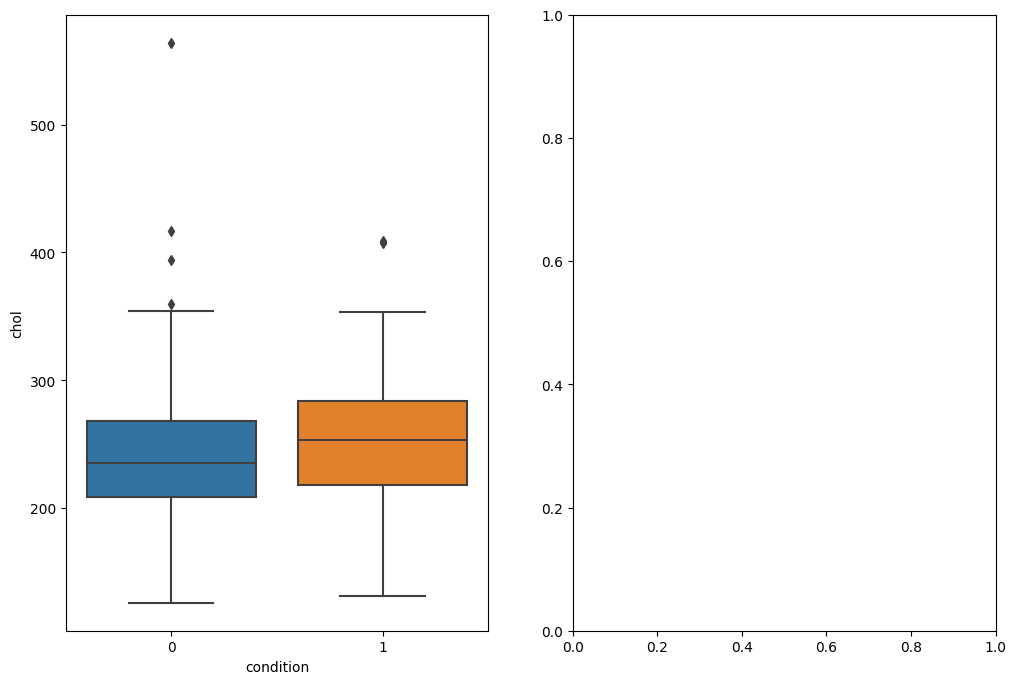

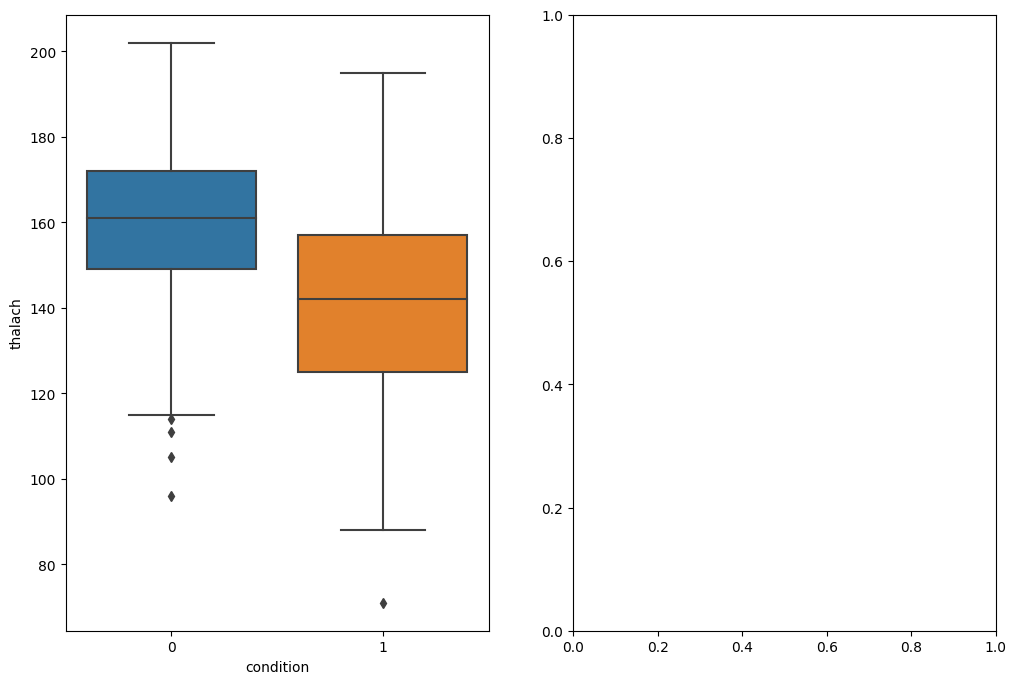

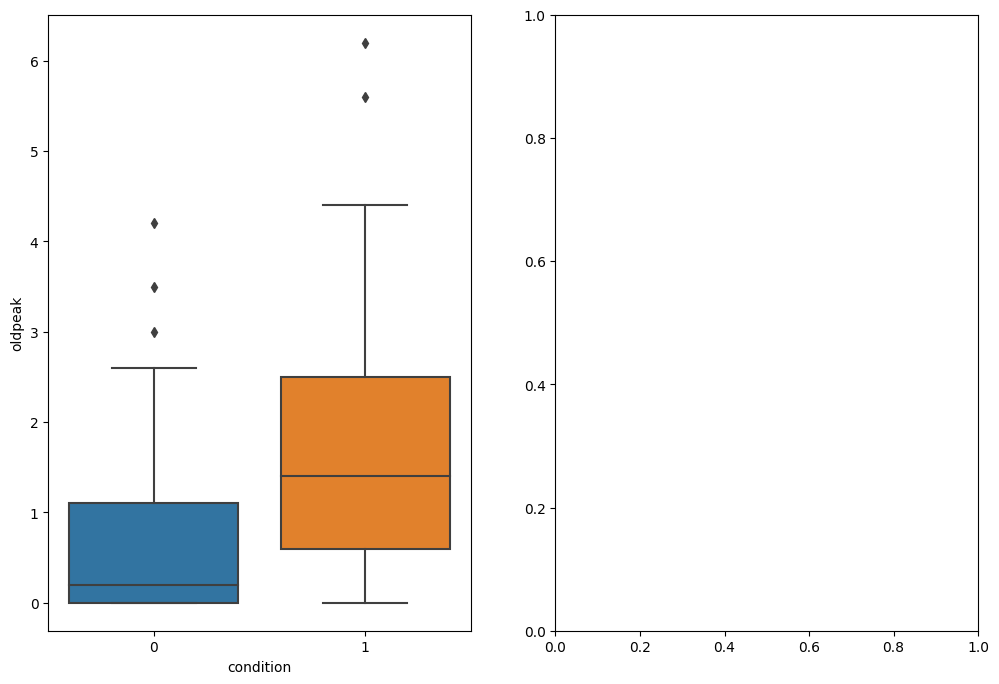

In [25]:
for col in df.select_dtypes(include='number').drop("condition", axis=1).columns:
    fig, ax =plt.subplots(1,2, figsize=(12,8))
    sns.boxplot(data=df,x='condition', y=col, ax=ax[0])
    plt.show()

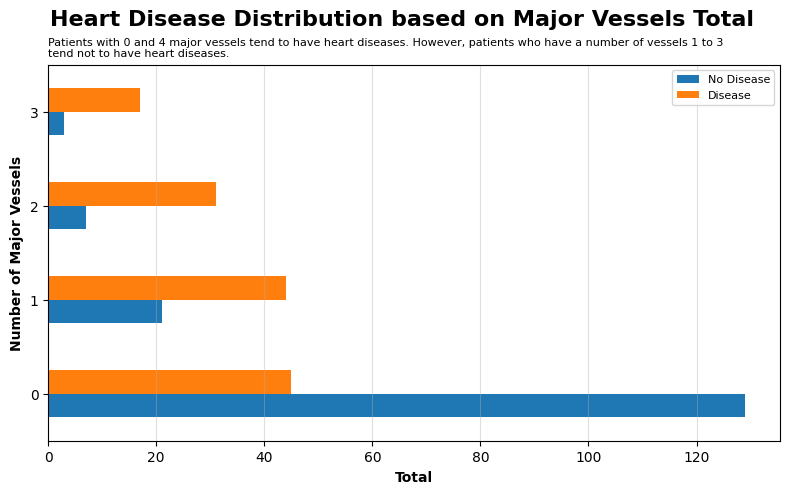

In [14]:
# --- Creating Horizontal Bar Chart ---
ax = pd.crosstab(df.ca, df.condition).plot(kind='barh', figsize=(8, 5))


plt.suptitle('Heart Disease Distribution based on Major Vessels Total', 
             fontweight='heavy', x=0.069, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif')
plt.title('Patients with 0 and 4 major vessels tend to have heart diseases. However, patients who have a number of vessels 1 to 3\ntend not to have heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left')

plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Number of Major Vessels', fontfamily='sans-serif', fontweight='bold')

plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)
plt.legend(labels=['No Disease', 'Disease'], fontsize='8', frameon=True,
           title_fontsize='9', loc='upper right');

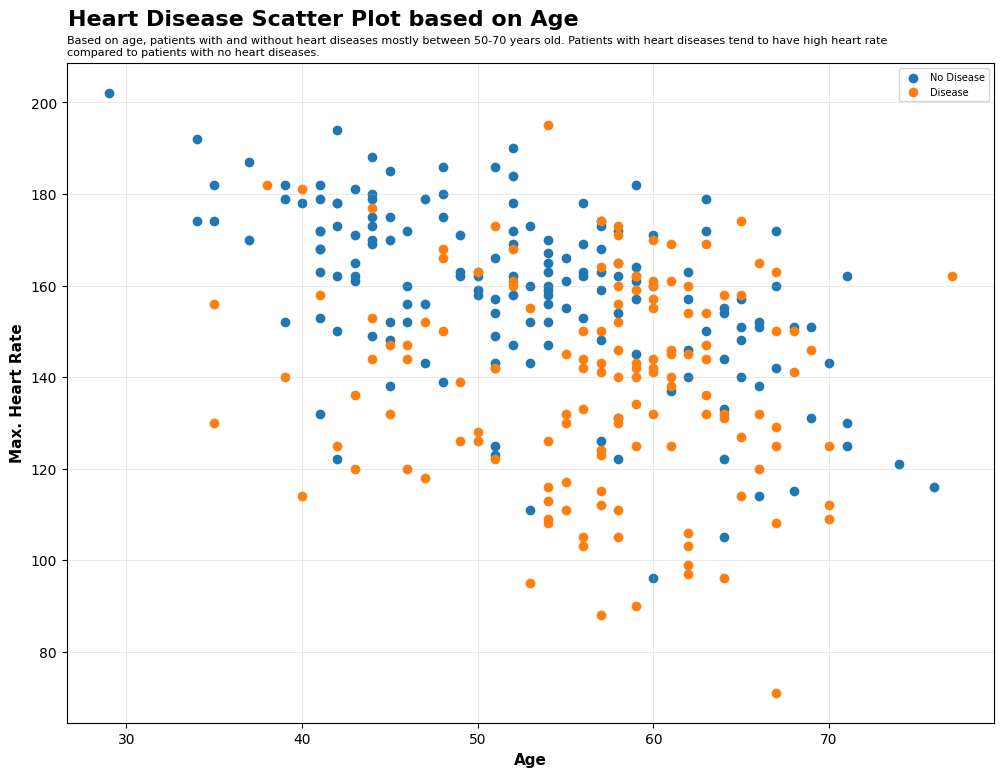

In [15]:
# -- Scatter Plot Size & Titles Settings ---
plt.figure(figsize=(10, 8))
plt.suptitle('Heart Disease Scatter Plot based on Age', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')

plt.title('Based on age, patients with and without heart diseases mostly between 50-70 years old. Patients with heart diseases tend to have high heart rate\ncompared to patients with no heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left')

plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Scatter Plot ---
plt.scatter(x=df.age[df.condition==0], y=df.thalach[(df.condition==0)])
plt.scatter(x=df.age[df.condition==1], y=df.thalach[(df.condition==1)])

# --- Scatter Plot Legend & Labels Settings ---
plt.legend(['No Disease', 'Disease'], fontsize='7', 
           title_fontsize='8', loc='upper right', frameon=True)

plt.xlabel('Age', fontweight='bold', fontsize='11',
           fontfamily='sans-serif')

plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11', 
           fontfamily='sans-serif')

plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show();

<Figure size 1000x800 with 0 Axes>

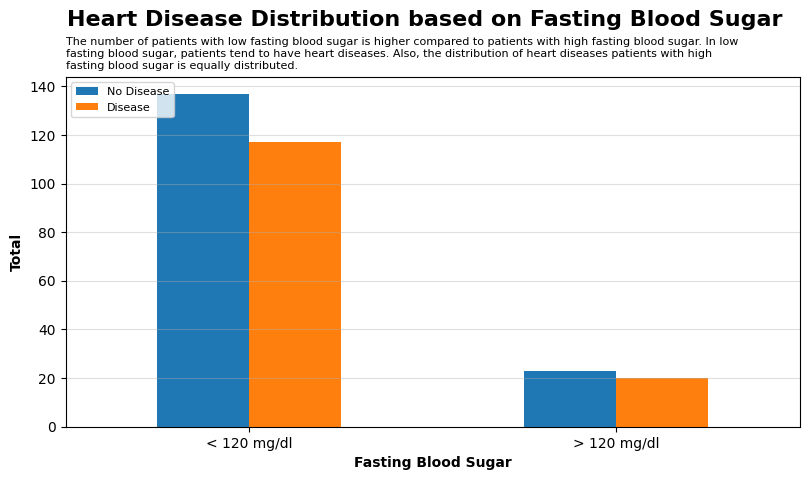

In [17]:
# --- Labels Settings ---
labels = ['No Disease', 'Disease']
label_fbs = np.array([0, 1])
label_fbs2 = ['< 120 mg/dl', '> 120 mg/dl']

plt.figure(figsize=(10, 8))

# --- Creating Bar Chart ---
ax = pd.crosstab(df.fbs, df.condition).plot(kind='bar', figsize=(8, 5))



plt.suptitle('Heart Disease Distribution based on Fasting Blood Sugar', 
             fontweight='heavy', x=0.065, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif')

plt.title('The number of patients with low fasting blood sugar is higher compared to patients with high fasting blood sugar. In low\nfasting blood sugar, patients tend to have heart diseases. Also, the distribution of heart diseases patients with high\nfasting blood sugar is equally distributed.', 
          fontsize='8', fontfamily='sans-serif', loc='left')

plt.tight_layout(rect=[0, 0.04, 1, 1.025])

plt.xlabel('Fasting Blood Sugar', fontfamily='sans-serif', fontweight='bold')

plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')

plt.xticks(label_fbs, label_fbs2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

In [45]:
## Finding correlation wrt to target variable

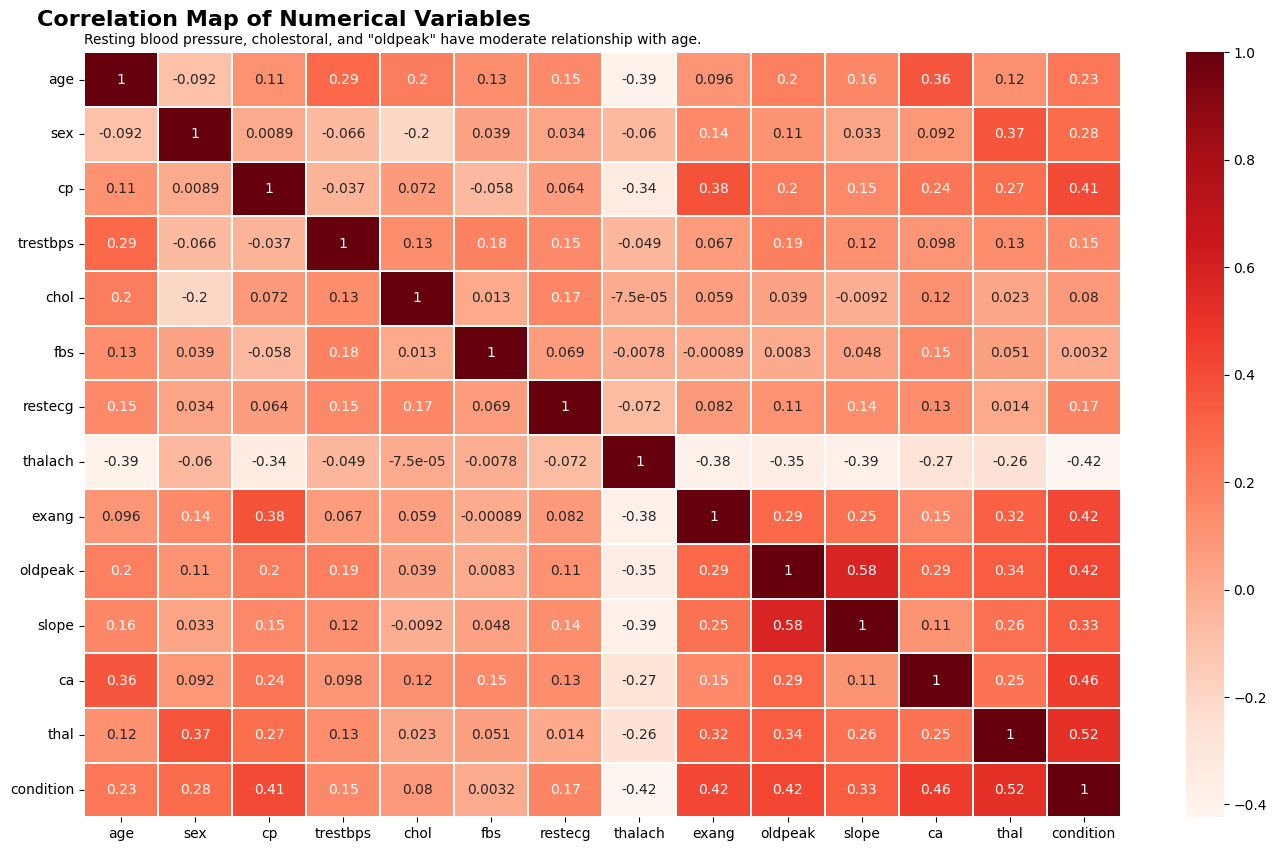

In [55]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))

sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)

plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')

plt.title('Resting blood pressure, cholestoral, and "oldpeak" have moderate relationship with age.', 
          fontsize='10', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

In [46]:
# Filter features with correlation to target variable
df_corr = abs(df.corr())['condition']
df_corr.sort_values(ascending=False)

condition    1.000000
thal         0.520516
ca           0.463189
oldpeak      0.424052
thalach      0.423817
exang        0.421355
cp           0.408945
slope        0.333049
sex          0.278467
age          0.227075
restecg      0.166343
trestbps     0.153490
chol         0.080285
fbs          0.003167
Name: condition, dtype: float64

In [56]:
# Select features with correlation greater than threshold
final_df_corr = df_corr[(df_corr>0.2) & (df_corr < 1)].sort_values(ascending=False)
final_df_corr

thal       0.520516
ca         0.463189
oldpeak    0.424052
thalach    0.423817
exang      0.421355
cp         0.408945
slope      0.333049
sex        0.278467
age        0.227075
Name: condition, dtype: float64

In [58]:
final_df_corr_cols = final_df_corr.index

In [59]:
final_df_corr_cols

Index(['thal', 'ca', 'oldpeak', 'thalach', 'exang', 'cp', 'slope', 'sex',
       'age'],
      dtype='object')

## Feature Engineering <a class="anchor" id="feature_engineering"></a>

## Preprocessing: Class imbalance, missing values <a class="anchor" id="#pre"></a>

condition
0    160
1    137
Name: count, dtype: int64


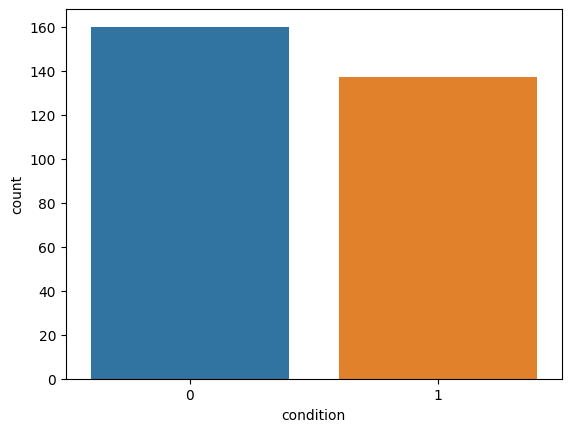

In [60]:
# Check for class imbalance
sns.countplot(x='condition',data=df)
print(df.condition.value_counts())

In [61]:
# Convert columns to object datatype

In [62]:
catg_cols = ['cp','thal','slope','ca']

In [68]:
cp_df = pd.get_dummies(df['cp'].astype(str),prefix = 'cp')
thal_df = pd.get_dummies(df['thal'],dtype=int, prefix='thal')
slope_df = pd.get_dummies(df['slope'], dtype=int, prefix='slope')
ca_df = pd.get_dummies(df['ca'], dtype=int,prefix='ca')

In [69]:
df = pd.concat([df, cp_df, thal_df, slope_df, ca_df], axis=1)

In [70]:
df = df.drop(columns=catg_cols)
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,condition,...,thal_0,thal_1,thal_2,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3
0,69,1,160,234,1,2,131,0,0.1,0,...,1,0,0,0,1,0,0,1,0,0
1,69,0,140,239,0,0,151,0,1.8,0,...,1,0,0,1,0,0,0,0,1,0
2,66,0,150,226,0,0,114,0,2.6,0,...,1,0,0,0,0,1,1,0,0,0
3,65,1,138,282,1,2,174,0,1.4,1,...,1,0,0,0,1,0,0,1,0,0
4,64,1,110,211,0,2,144,1,1.8,0,...,1,0,0,0,1,0,1,0,0,0


In [71]:
## Check for missing values

In [72]:
df.isnull().sum()

age          0
sex          0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
condition    0
cp_0         0
cp_1         0
cp_2         0
cp_3         0
thal_0       0
thal_1       0
thal_2       0
slope_0      0
slope_1      0
slope_2      0
ca_0         0
ca_1         0
ca_2         0
ca_3         0
dtype: int64

In [73]:
# Split values - Features, target variable

In [74]:
X = df.drop("condition", axis=1)
y = df['condition']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [76]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [77]:
X_train = scaler.transform(X_train)

In [78]:
X_test = scaler.transform(X_test)

## Model building <a class="anchor" id="mb"></a>

In [49]:
# 1. Logistic Regression
LRmodel = LogisticRegression()

# Train Classifer
LRmodel.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = LRmodel.predict(X_test)
LRA=accuracy_score(y_test, y_pred)
print("Logistic Regression Model Accuracy:", LRA)

Logistic Regression Model Accuracy: 0.8111111111111111


In [50]:


pd.cut(df['thalach'], [0,150,200])

0        (0, 150]
1      (150, 200]
2        (0, 150]
3      (150, 200]
4        (0, 150]
          ...    
292    (150, 200]
293      (0, 150]
294      (0, 150]
295    (150, 200]
296    (150, 200]
Name: thalach, Length: 297, dtype: category
Categories (2, interval[int64, right]): [(0, 150] < (150, 200]]

## Performance metrics <a class="anchor" id="pm"></a>

## Model Deployment <a class="anchor" id="Model Deployment"></a>

In [51]:
## Reading dataset 